### fitting Ks mag, Teff, Fe/H, and parallax

In [9]:
from jaxstar import mistfit
from jax import random
import arviz, corner
import pandas as pd
import numpy as np

In [10]:
%matplotlib inline

In [11]:
mf = mistfit.MistFit()

In [16]:
d = pd.read_csv("/Users/k_masuda/Dropbox/repos/acheron/input/isoinput_cks_valid.csv")
_d = d.iloc[0]
kmag_obs, kmag_err, teff_obs, feh_obs, parallax_obs, parallax_err = np.array(_d[['kmag_corrected', 'kmag_err_corrected', 'teff', 'feh', 'parallax_corrected', 'parallax_error_corrected']]).astype(float)

In [18]:
teff_err, feh_err = 110, 0.1

In [19]:
mf.set_data(['kmag', 'teff', 'feh', 'parallax'],\
            [kmag_obs, teff_obs, feh_obs, parallax_obs],\
            [kmag_err, teff_err, feh_err, parallax_err])

In [20]:
# setup HMC
ns = 20000
mf.setup_hmc(num_warmup=ns, num_samples=ns)

In [21]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=False)

sample: 100%|███████████████████████████████████████████████████████████████| 40000/40000 [00:18<00:00, 2163.82it/s, 7 steps of size 8.24e-03. acc. prob=0.96]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      3.54      2.76      2.85      0.10      7.56   4598.48      1.00
  distance      0.44      0.00      0.44      0.44      0.45   7891.84      1.00
       eep    326.22     30.67    330.99    274.06    377.18   4434.69      1.00
       feh      0.23      0.09      0.23      0.09      0.37   5966.26      1.00

Number of divergences: 0


In [22]:
mcmc = mf.mcmc
samples = mf.samples

In [23]:
# keys and observed values for corner plot
outkeys = mf.obskeys + ['mass', 'radius', 'age', 'eep']
obsvals = mf.obsvals + [None] * 4

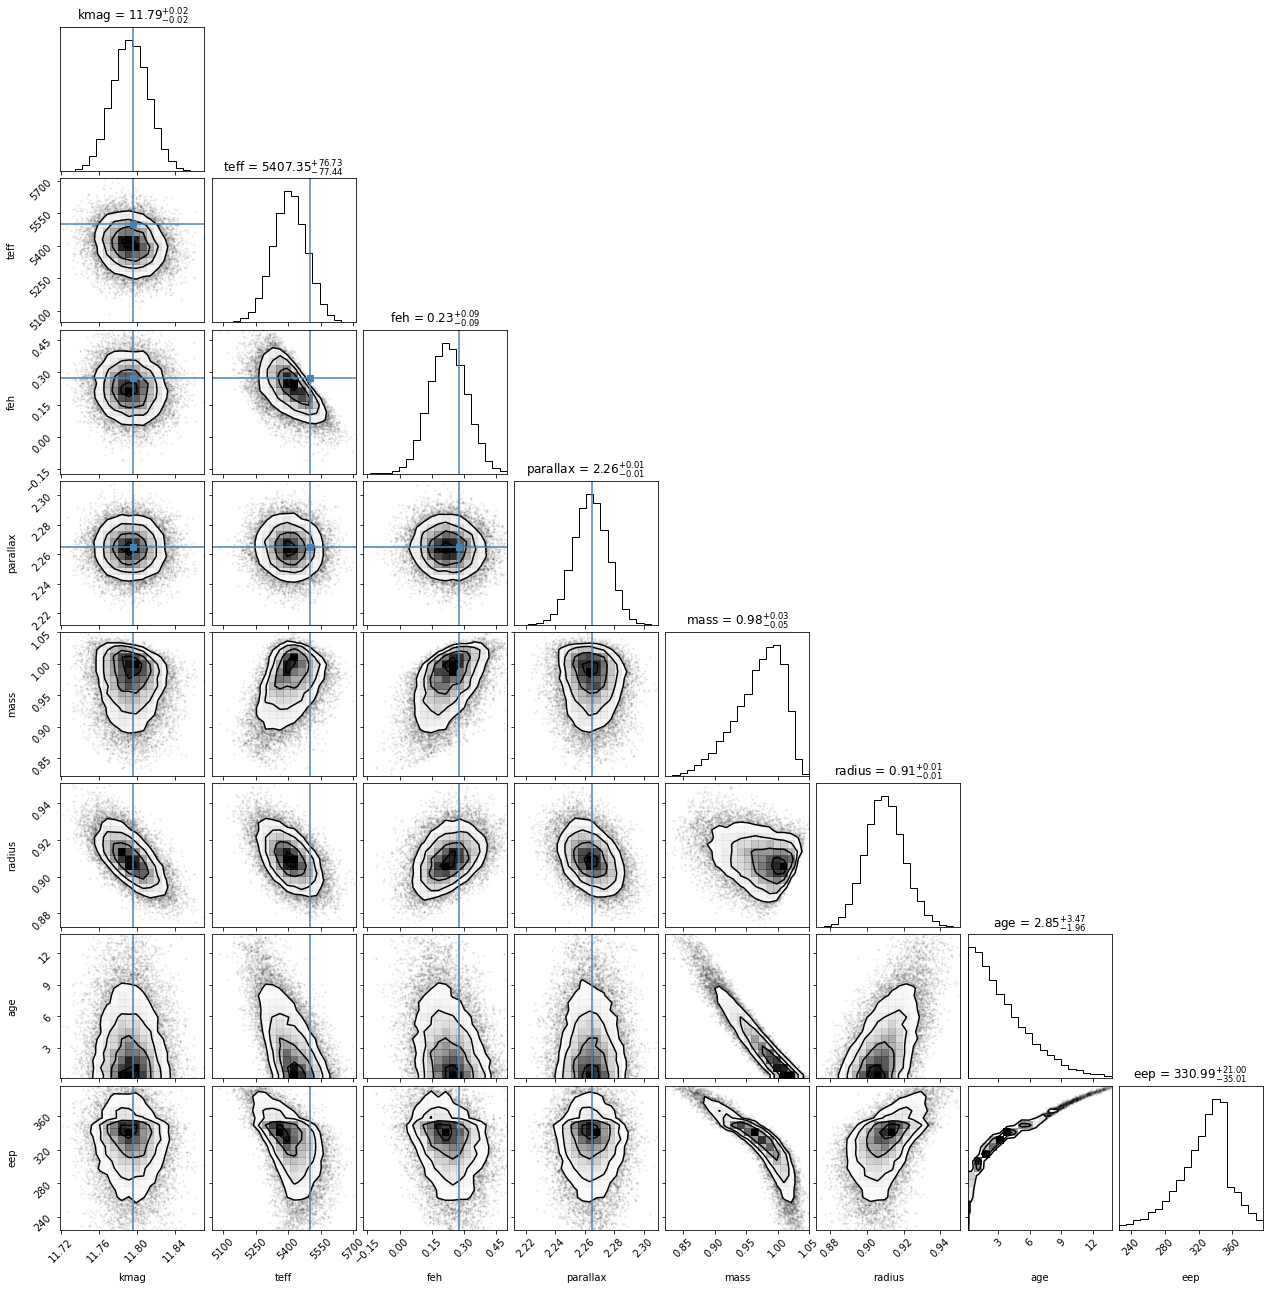

In [24]:
params = pd.DataFrame(data=dict(zip(outkeys, [samples[k] for k in outkeys])))
fig = corner.corner(params, show_titles="%.2f", truths=obsvals)

### biased Teff

In [31]:
mf.set_data(['kmag', 'teff', 'feh', 'parallax'],\
            [kmag_obs, teff_obs-200., feh_obs, parallax_obs],\
            [kmag_err, teff_err, feh_err, parallax_err])

In [32]:
# setup HMC
ns = 20000
mf.setup_hmc(num_warmup=ns, num_samples=ns)
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=False)

sample: 100%|█████████████████████████████████████████████████████████████| 40000/40000 [00:16<00:00, 2435.97it/s, 151 steps of size 1.14e-02. acc. prob=0.95]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      6.20      3.64      5.94      0.10     11.45   3041.92      1.00
  distance      0.44      0.00      0.44      0.44      0.45   7799.17      1.00
       eep    348.88     30.51    350.54    308.69    395.98   2701.34      1.00
       feh      0.28      0.09      0.29      0.15      0.43   5977.35      1.00

Number of divergences: 0


In [33]:
mcmc = mf.mcmc
samples = mf.samples

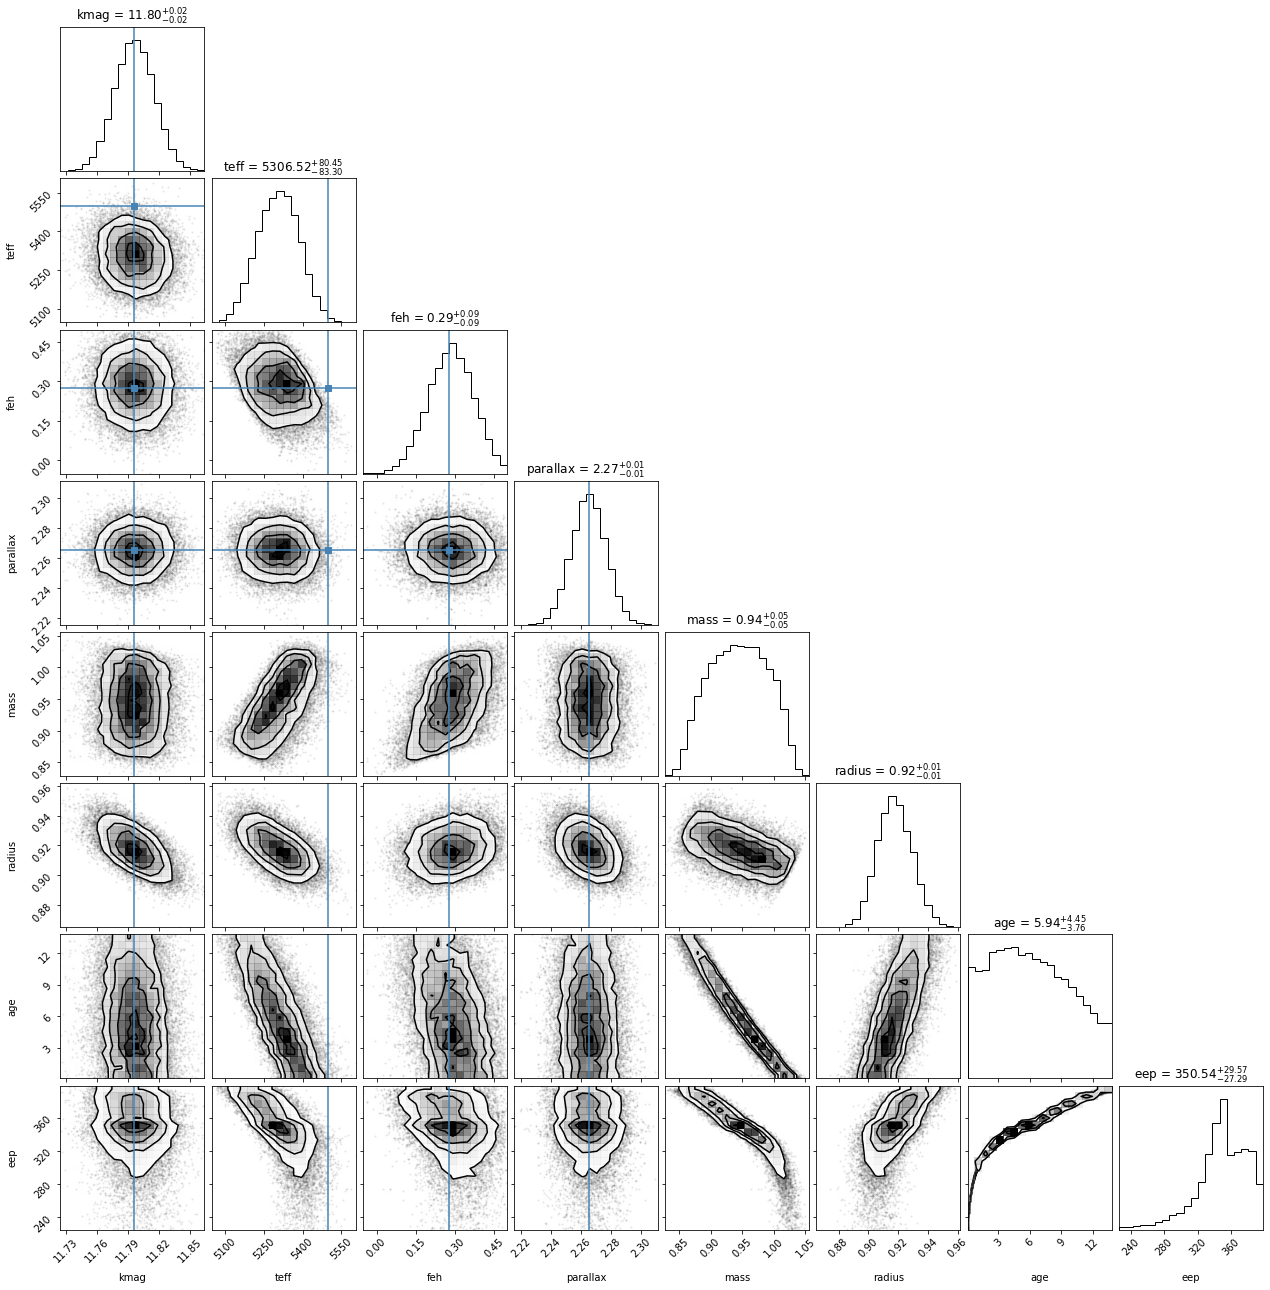

In [34]:
params = pd.DataFrame(data=dict(zip(outkeys, [samples[k] for k in outkeys])))
fig = corner.corner(params, show_titles="%.2f", truths=obsvals)